In [45]:
# !pip install transformers
# !pip install datasets
# !pip install umap-learn
# !pip install sentencepiece

In [46]:
from transformers import AutoModelForSequenceClassification
from datasets import load_dataset
from transformers import AutoTokenizer, AutoConfig
from transformers import AutoModel
from torch import torch
import pandas as pd
import matplotlib.pyplot as plt

from datasets import Dataset, DatasetDict
from datasets import ClassLabel, concatenate_datasets
from datasets import Dataset, ClassLabel, Features, Value
from sklearn.model_selection import train_test_split

import datasets
import pandas as pd

In [47]:
TEXT_COL      = 'text'
CLASS_COL_ST1 = 'label'

In [48]:
# extended_df = load_dataset("cardiffnlp/tweet_sentiment_multilingual", 'spanish')
# descomente la siguiente línea para leer datos desde un URL

extended_train_path = 'data/extended/extended_train.csv'
extended_validation_path = 'data/extended/extended_validation.csv'
extended_test_path = 'data/extended/extended_test.csv'

# Reading the data
df_extended_train = pd.read_csv(extended_train_path)
df_extended_validation = pd.read_csv(extended_validation_path)
df_extended_test = pd.read_csv(extended_test_path)


display(df_extended_train)
display(df_extended_validation)
display(df_extended_test)

,text,label
0,estoy hasta el ojete de que me digáis que teng...,0
1,@user Por? Tenía pensado verla después de la ...,1
2,Esto de estar feliz mola,2
3,Ya no es tan divertido,0
4,@user te recuerdo que soy una persona que tien...,1
...,...,...
1834,@user justo hoy tengo la cena de fin de año de...,1
1835,#FF a los magníficos de @user !!,2
1836,No puedo poner el insta histories ese raro al...,0
1837,Apagado o fuera de cobertura,1


,text,label
0,@user La prensa cada vez más desacreditada De...,0
1,Uds locas por sun and moon me dieron ganas de ...,1
2,@user Buenos Vídeos.Se que llegadas a los 1.00...,2
3,El amanecer va a ser bien feo por el recuento ...,0
4,Hoy estaré en @user en zona de Humor ups! De A...,1
...,...,...
319,@user que no en serio,1
320,"@user buenas noches, David un abrazo!",2
321,¿Quién va a querer a un tipo que llega a su ca...,0
322,millennial memorial: cambiar contraseña wifi c...,1


,text,label
0,"@user jajajaja dale, hacete la boluda vos jaja...",0
1,cada vez que cito un tweet se va la ubicación ...,1
2,@user MAAAAE RAJADO! Pero lo bueno es q uno se...,2
3,Bueno hoy fui a almorzar a Nanay con otras 3 d...,0
4,Necesito seguir a mas cuentas camren shippers ...,1
...,...,...
865,"@user a mi a las 8.15 que son las 7.15, no too...",1
866,"@user Ah bueno, gracias por estar taaaan pendi...",2
867,@user Esto es lo más triste :! Pero espero que...,0
868,@user @user pregunta seria. para cuando kedad...,1


In [49]:
df_extended_train["label"] = df_extended_train["label"].apply(lambda x: 1 if x == 0 else 0)
df_extended_validation["label"] = df_extended_validation["label"].apply(lambda x: 1 if x == 0 else 0)
df_extended_test["label"] = df_extended_test["label"].apply(lambda x: 1 if x == 0 else 0)

In [50]:
display(df_extended_train)
display(df_extended_validation)
display(df_extended_test)

,text,label
0,estoy hasta el ojete de que me digáis que teng...,1
1,@user Por? Tenía pensado verla después de la ...,0
2,Esto de estar feliz mola,0
3,Ya no es tan divertido,1
4,@user te recuerdo que soy una persona que tien...,0
...,...,...
1834,@user justo hoy tengo la cena de fin de año de...,0
1835,#FF a los magníficos de @user !!,0
1836,No puedo poner el insta histories ese raro al...,1
1837,Apagado o fuera de cobertura,0


,text,label
0,@user La prensa cada vez más desacreditada De...,1
1,Uds locas por sun and moon me dieron ganas de ...,0
2,@user Buenos Vídeos.Se que llegadas a los 1.00...,0
3,El amanecer va a ser bien feo por el recuento ...,1
4,Hoy estaré en @user en zona de Humor ups! De A...,0
...,...,...
319,@user que no en serio,0
320,"@user buenas noches, David un abrazo!",0
321,¿Quién va a querer a un tipo que llega a su ca...,1
322,millennial memorial: cambiar contraseña wifi c...,0


,text,label
0,"@user jajajaja dale, hacete la boluda vos jaja...",1
1,cada vez que cito un tweet se va la ubicación ...,0
2,@user MAAAAE RAJADO! Pero lo bueno es q uno se...,0
3,Bueno hoy fui a almorzar a Nanay con otras 3 d...,1
4,Necesito seguir a mas cuentas camren shippers ...,0
...,...,...
865,"@user a mi a las 8.15 que son las 7.15, no too...",0
866,"@user Ah bueno, gracias por estar taaaan pendi...",0
867,@user Esto es lo más triste :! Pero espero que...,1
868,@user @user pregunta seria. para cuando kedad...,0


In [51]:
# for split, data in extended_df.items():
#     data.to_csv(f"/extended_{split}.csv")

In [52]:
# display(extended_df)
# display(extended_df['train'].features)

In [53]:
# extended_df['train'].features

In [54]:
# # Create a ClassLabel object
# class_label = ClassLabel(names=['no', 'yes'])

# # Convert a class name to a class index
# class_index = class_label.str2int('yes')
# print(class_index) # 1

# # Convert a class index to a class name
# class_name = class_label.int2str(0)
# print(class_name) # 'no'

In [55]:

# # Define a function that takes in a row and returns the updated row
# def update_row(example):
#     # Get the class name for the current class index
#     class_name = extended_df['train'].features['label'].int2str(example['label'])
    
#     # Convert the class name to the new class index
#     new_class_index = class_label.str2int(class_name)
    
#     # Update the value of the class label column
#     example['label'] = new_class_index
#     return example

# # Update the dataset using the update_row function
# updated_dataset = extended_df.map(update_row)

# # Update the dataset's features to use the new ClassLabel object
# updated_features = updated_dataset.features.copy()
# updated_features['label'] = class_label
# updated_dataset = Dataset.from_dict(updated_dataset.to_dict(), features=updated_features)

In [56]:
# descomente la siguiente línea para leer datos desde un URL

train_url = 'https://raw.githubusercontent.com/carlossuazo/davincis-iberlef-2023/main/data/training_data/train.csv'
test_url = 'https://raw.githubusercontent.com/carlossuazo/davincis-iberlef-2023/main/data/test_data/test.csv'

# Dataset de entrenamiento
df_train = pd.read_csv(train_url, header=None, names = [TEXT_COL, CLASS_COL_ST1])

# Dataset de test
df_test  = pd.read_csv(test_url, header=None, names = [TEXT_COL, CLASS_COL_ST1])

display(df_train)
display(df_test)

,text,label
0,#Ahora | Reportan accidente de tránsito en el ...,1
1,#PrecauciónVial en #CDMX se registra cierre pa...,0
2,#traficogt 🚨🚨👉 http 3. Se realizan trabajos ...,0
3,#HoyMismo #Internacionales | El Gobierno de J...,0
4,"Casos como el accidente en Villa Lorena, en el...",0
...,...,...
3357,"Bomberos atendieron accidente vehicular, vía h...",1
3358,El @user y @user recuerdan al escritor Eraclio...,0
3359,Recientemente lo dejaron libre bajo fianza y a...,1
3360,Accidente en Calle 127 &gt; Oriente #traficobo...,0


,text,label
0,Accidente en el Vallado frente al polideportiv...,1
1,Vitor Belfort abruma a Evander Holyfield en la...,0
2,"En México, las estadísticas de violencia homic...",0
3,"Como Jorge Armando Ayala Guarín de 25 años, f...",1
4,Quebrar un vidrio ///// Quebrar el país a plom...,0
5,"#EsNoticia 📌 En aparente estado de embriaguez,...",1
6,@user Por último ponga la queja en CNN en espa...,0
7,174 aniversario de la Gesta Heroica de los Niñ...,0
8,SigAlert en Lake Elsinore. En la I-15 norte ce...,0
9,LO ÚLTIMO Al menos dos personas resultaron her...,1


In [57]:
df = pd.concat([df_train, df_test])
display(df)

,text,label
0,#Ahora | Reportan accidente de tránsito en el ...,1
1,#PrecauciónVial en #CDMX se registra cierre pa...,0
2,#traficogt 🚨🚨👉 http 3. Se realizan trabajos ...,0
3,#HoyMismo #Internacionales | El Gobierno de J...,0
4,"Casos como el accidente en Villa Lorena, en el...",0
...,...,...
45,Dos policías municipales de Manzanillo quedaro...,1
46,el suicidio es un evento inesperado y multicau...,0
47,#PrecauciónVial en #Jalisco se registra cierre...,0
48,"🆘 De acuerdo con cifras oficiales, la violenci...",0


In [58]:
df_train, df_test = train_test_split(df, test_size=0.15)
df_train, df_validation = train_test_split(df_train, test_size=0.15)

In [59]:
df_train = pd.concat([df_train, df_extended_train], ignore_index=True)
df_validation = pd.concat([df_validation, df_extended_train], ignore_index=True)
df_test = pd.concat([df_test, df_extended_test], ignore_index=True)

# df_train["label"] = df_train["label"].apply(lambda x: 'harmfull' if x == 1 else 'no_harmfull')
# df_validation["label"] = df_validation["label"].apply(lambda x: 'harmfull' if x == 1 else 'no_harmfull')
# df_test["label"] = df_test["label"].apply(lambda x: 'harmfull' if x == 1 else 'no_harmfull')

display(df_train)
display(df_validation)
display(df_test)

,text,label
0,#JUDICIAL Los funcionarios trabajan articulada...,0
1,#Internacional 🚨 Asesinan al presidente Joven...,1
2,@user Samuel el Man que pateo brutalmente en l...,0
3,DETIENEN A UN HOMBRE BAJO EL DELITO DE SECUEST...,1
4,"No le sueltes la mano a tus amigos, a tu famil...",0
...,...,...
4299,@user justo hoy tengo la cena de fin de año de...,0
4300,#FF a los magníficos de @user !!,0
4301,No puedo poner el insta histories ese raro al...,1
4302,Apagado o fuera de cobertura,0


,text,label
0,ALERTA | Chascomús: murió un bebé de 4 meses p...,0
1,"Test de alcoholemia, croquis del accidente y f...",0
2,Se registra accidente vehicular debajo del dis...,1
3,#Sucesos| Empleado de la morgue robó prótesis ...,1
4,#PMTSanJuanSac | Aparatoso accidente ocurre en...,1
...,...,...
2269,@user justo hoy tengo la cena de fin de año de...,0
2270,#FF a los magníficos de @user !!,0
2271,No puedo poner el insta histories ese raro al...,1
2272,Apagado o fuera de cobertura,0


,text,label
0,El Club Deportivo Victoria emite acuerdo de du...,0
1,#ÚltimaHora Cinco tripulantes de un helicópt...,1
2,@user accidente en la A2 sentido Lleida a la a...,1
3,Mueren al menos dos personas en accidente en s...,1
4,#HoyTambiénSeHabla de que uno de los seis dete...,1
...,...,...
1377,"@user a mi a las 8.15 que son las 7.15, no too...",0
1378,"@user Ah bueno, gracias por estar taaaan pendi...",0
1379,@user Esto es lo más triste :! Pero espero que...,1
1380,@user @user pregunta seria. para cuando kedad...,0


In [60]:
df_train = df_train.reset_index(drop=True)
df_validation = df_validation.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [61]:
# Display the original column names
print("Original column names:")
print(df_train.columns)

# Display the original column names
print("Original column names:")
print(df_test.columns)

# Display the original column names
print("Original column names:")
print(df_validation.columns)


Original column names:
Index(['text', 'label'], dtype='object')
Original column names:
Index(['text', 'label'], dtype='object')
Original column names:
Index(['text', 'label'], dtype='object')


In [62]:
df = DatasetDict({
    "train": Dataset.from_pandas(df_train, features=Features({'text': Value('string'),'label': ClassLabel(names=['no_harmfull', 'harmfull'])})),
    "test": Dataset.from_pandas(df_test, features=Features({'text': Value('string'),'label': ClassLabel(names=['no_harmfull', 'harmfull'])})),
    "validation": Dataset.from_pandas(df_validation, features=Features({'text': Value('string'),'label': ClassLabel(names=['no_harmfull', 'harmfull'])}))
    })

In [63]:
df['train'].features


{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['no_harmfull', 'harmfull'], id=None)}

In [64]:
#df = concatenate_datasets([df['train'], extended_df['train']])

In [65]:
df

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 4304
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1382
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2274
    })
})

In [66]:
df['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['no_harmfull', 'harmfull'], id=None)}

In [67]:
model_ckpt = f"distilbert-base-uncased" #"cardiffnlp/twitter-roberta-base-sentiment"#"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [68]:
text = 'Tokenizar el texto es una tarea central del NLP.'
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 21335, 2099, 3449, 3793, 2080, 9686, 14477, 16985, 5243, 2430, 3972, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [69]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##iza', '##r', 'el', 'text', '##o', 'es', 'una', 'tar', '##ea', 'central', 'del', 'nl', '##p', '.', '[SEP]']


In [70]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizar el texto es una tarea central del nlp. [SEP]


In [71]:
tokenizer.vocab_size

30522

In [72]:
tokenizer.model_max_length

512

In [73]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [74]:
def tokenize(batch):
    return tokenizer(batch[TEXT_COL], padding=True, truncation=True)

In [75]:
print(tokenize(df["train"][:2]))

{'input_ids': [[101, 1001, 8268, 3050, 4569, 10446, 16843, 2015, 19817, 19736, 8405, 2396, 2594, 7068, 17130, 15781, 9530, 2474, 10819, 10446, 2389, 2139, 6671, 2080, 4203, 18950, 11498, 9686, 20464, 12069, 17119, 3449, 4926, 2063, 4372, 11721, 7895, 1012, 100, 8299, 8299, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1001, 27607, 100, 2004, 2229, 3981, 2078, 2632, 2343, 2063, 8183, 8159, 2884, 25175, 3366, 2139, 12867, 100, 1012, 4372, 3449, 17306, 23223, 2765, 2080, 2014, 8524, 2139, 21451, 2474, 14837, 5477, 2050, 1010, 3235, 2063, 25175, 3366, 1010, 10861, 9765, 2050, 28667, 12322, 9013, 3527, 12731, 27893, 2891, 19960, 11261, 2015, 1010, 7367, 12734, 4895, 4012, 19496, 3540, 3527, 3813, 9365, 18499, 3312, 1012, 20010, 24164, 2015, 4372, 1030, 5310, 4372, 1001, 5033, 2575, 8299, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [76]:
tweets_encoded = df.map(tokenize, batched=True, batch_size=None) #batch_size=None

Map:   0%|          | 0/4304 [00:00<?, ? examples/s]

Map:   0%|          | 0/1382 [00:00<?, ? examples/s]

Map:   0%|          | 0/2274 [00:00<?, ? examples/s]

In [77]:
# al aplicar map se agregan dos nuevas columnas al objeto, 
print(tweets_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [78]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [79]:
from transformers import TFAutoModel

#tf_model = TFAutoModel.from_pretrained(model_ckpt)

In [80]:
#tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base")

In [81]:
#tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

In [82]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [83]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [84]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [85]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [86]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}
# def extract_hidden_states(batch):
#     # Place model inputs on the GPU
#     inputs = {k: torch.tensor(v).to(device) if isinstance(v, list) else v.to(device)
#               for k,v in batch.items()
#               if k in tokenizer.model_input_names}
#     # Extract last hidden states
#     with torch.no_grad():
#         last_hidden_state = model(**inputs).last_hidden_state
#     # Return vector for [CLS] token
#     return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [87]:
tweets_encoded.set_format("torch",  columns=["input_ids", "attention_mask", CLASS_COL_ST1])

In [88]:
tweets_hidden = tweets_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/4304 [00:00<?, ? examples/s]

Map:   0%|          | 0/1382 [00:00<?, ? examples/s]

Map:   0%|          | 0/2274 [00:00<?, ? examples/s]

In [89]:
def label_int2str(row):
    return df["train"].features[CLASS_COL_ST1].int2str(row)

In [90]:
tweets_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [91]:
import numpy as np

X_train = np.array(tweets_hidden["train"]["hidden_state"])
X_valid = np.array(tweets_hidden["test"]["hidden_state"])
y_train = np.array(tweets_hidden["train"][CLASS_COL_ST1])
y_valid = np.array(tweets_hidden["test"][CLASS_COL_ST1])
X_train.shape, X_valid.shape

((4304, 768), (1382, 768))

In [92]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb[CLASS_COL_ST1] = y_train
df_emb.head()

,X,Y,label
0,8.813732,1.890291,0
1,9.511938,4.299624,1
2,9.057740,5.596570,0
3,9.230237,1.131121,1
4,12.176910,6.874276,0


In [93]:
df['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['no_harmfull', 'harmfull'], id=None)}

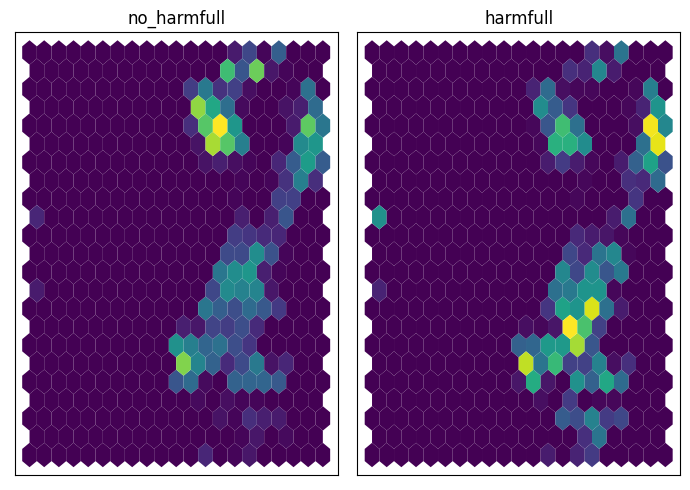

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = df["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"],# cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [95]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6874095513748191

In [96]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.6099855282199711

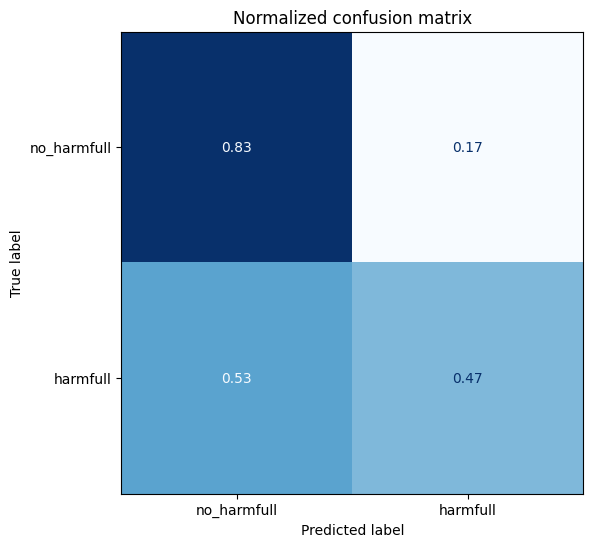

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [98]:
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels, ignore_mismatched_sizes=True)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.w

In [99]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [100]:
from huggingface_hub import notebook_login

notebook_login()

In [101]:
from transformers import Trainer, TrainingArguments

batch_size = 16
logging_steps = len(tweets_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=3,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [102]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=tweets_encoded["train"],
                  eval_dataset=tweets_encoded["test"],
                  tokenizer=tokenizer)
trainer.train();

Cloning https://huggingface.co/csuazob/distilbert-base-uncased-finetuned-emotion into local empty directory.


Download file pytorch_model.bin:   0%|          | 7.40k/255M [00:00<?, ?B/s]

Download file training_args.bin: 100%|##########| 3.43k/3.43k [00:00<?, ?B/s]

Download file runs/Mar07_23-09-14_da34b3524f48/1678230579.8936908/events.out.tfevents.1678230579.da34b3524f48.…

Download file runs/Mar07_23-09-14_da34b3524f48/events.out.tfevents.1678230579.da34b3524f48.866.0: 100%|#######…

Clean file training_args.bin:  29%|##9       | 1.00k/3.43k [00:00<?, ?B/s]

Clean file runs/Mar07_23-09-14_da34b3524f48/1678230579.8936908/events.out.tfevents.1678230579.da34b3524f48.866…

Clean file runs/Mar07_23-09-14_da34b3524f48/events.out.tfevents.1678230579.da34b3524f48.866.0:  15%|#4        …

Clean file pytorch_model.bin:   0%|          | 1.00k/255M [00:00<?, ?B/s]

c:\Users\OWNER\anaconda3\envs\nlpbook\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/807 [00:00<?, ?it/s]